<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed


In [2]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-20 04:15:33--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22722 (22K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  22.19K  --.-KB/s    in 0.001s  

2021-05-20 04:15:33 (17.1 MB/s) - ‘data_phot.csv’ saved [22722/22722]



In [3]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375
...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403


In [8]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,d_hi-d,d_lo-d,sd
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,0.662431,-0.651813,0.005309


In [67]:
#GENERATE
data_sample = []
data_sample = pd.DataFrame(data_sample)

#seed(12)

for i in range(208) :
  data_sample[i] = np.random.normal(data_phot.d_est[i] ,data_phot.sd[i], 10**4) 
  
 

In [68]:
data_sample

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207
0,192.948047,106.499903,40.706453,148.670657,201.813371,111.969897,144.103574,45.524023,172.700377,23.997046,110.168002,178.800943,202.319531,139.267213,163.706739,83.717014,27.730074,45.275790,100.474956,41.655656,92.933830,194.475686,111.370289,152.168306,53.110569,157.379669,154.260359,66.221175,148.792163,474.104856,134.861572,113.831983,192.251034,98.350746,109.551364,91.630922,78.446912,261.304065,71.057961,124.094911,...,317.151656,97.838937,92.833124,244.481108,109.749715,132.839002,144.046299,231.225754,144.088416,132.843023,51.681171,187.987030,316.989919,60.036918,85.440396,157.810925,134.788679,192.370140,97.098893,173.520822,58.285019,183.824663,190.229646,107.876371,101.483086,63.986367,219.855331,159.121365,217.507361,141.893685,301.556637,121.726618,162.905203,249.312336,80.201080,75.954701,199.406526,68.308476,79.894768,126.629452
1,192.992866,106.538543,40.706456,148.672340,201.856770,111.970466,144.103912,45.524084,172.666459,23.997019,110.180188,178.895487,202.355979,139.256748,163.779844,83.716777,27.729342,45.275966,100.475269,41.655805,92.931027,194.452923,111.369250,152.118832,53.110545,157.390388,154.255608,66.221801,148.922406,474.946940,134.768438,113.818479,192.839525,98.355492,109.549343,91.624376,78.445870,261.406119,71.057269,124.091079,...,316.602107,97.839397,92.832816,244.510427,109.750398,132.838691,144.094074,231.271619,144.068389,132.846406,51.680712,187.958166,317.267767,60.037477,85.439221,157.836174,134.864306,192.376035,97.131706,173.536918,58.283485,183.844423,190.369794,107.877173,101.378642,64.283726,219.853010,159.112845,217.574852,141.908949,301.425085,121.705003,162.906107,249.055611,80.201614,75.955005,199.504545,68.306365,79.896638,126.609625
2,192.959848,106.532325,40.706385,148.662506,201.858880,111.975271,144.110252,45.523967,172.626104,23.997029,110.174716,178.863603,202.440604,139.267424,163.727989,83.718930,27.729778,45.275892,100.475534,41.655493,92.935078,194.487729,111.369198,152.160327,53.110660,157.361890,154.266162,66.220372,148.694185,473.717762,134.973396,113.809993,193.591451,98.359574,109.550721,91.626321,78.446251,261.332479,71.057320,124.096856,...,314.830841,97.838034,92.826323,244.463135,109.750785,132.837042,144.039796,231.224425,144.064188,132.844055,51.680581,187.966236,317.112365,60.037870,85.438678,157.824772,134.827722,192.320059,97.073559,173.524299,58.284731,183.943470,190.353179,107.874272,101.556190,64.457663,219.878191,159.102415,217.546546,141.897904,301.374237,121.741090,162.898049,249.071359,80.201100,75.954967,199.499952,68.307596,79.892525,126.610338
3,193.004227,106.502148,40.706307,148.669287,201.853201,111.970662,144.114295,45.524173,172.651957,23.997010,110.163094,178.856656,202.442295,139.265955,163.722553,83.716653,27.729723,45.275825,100.475617,41.655810,92.931265,194.433436,111.369004,152.447885,53.109776,157.396389,154.259236,66.220539,148.846595,473.934313,134.557066,113.811804,193.556894,98.354879,109.551888,91.633599,78.446471,261.398091,71.055313,124.102248,...,315.359744,97.840273,92.840613,244.533170,109.752706,132.835850,144.045652,231.223450,144.068562,132.850140,51.681096,187.982911,316.886812,60.038453,85.438232,157.844722,134.852458,192.360928,97.083233,173.534714,58.282818,183.666980,190.317091,107.874458,101.488627,64.297131,219.917599,159.146710,217.591618,141.886271,301.478374,121.700886,162.916395,249.133501,80.202291,75.955805,199.302408,68.307855,79.880682,126.628274
4,193.042465,106.515745,40.706277,148.662890,201.838008,111.973834,144.109175,45.523944,172.669182,23.997048,110.174622,178.843071,202.358004,139.259463,163.799547,83.716938,27.730372,45.275847,100.474064,41.655393,92.930155,194.468754,111.369564,152.280368,53.109937,157.388587,154.26

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


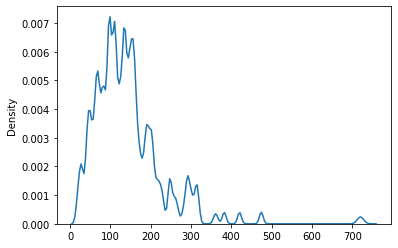

In [ ]:
sns.distplot(data_sample , hist=False)

In [69]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(208) :
    M_r[i] = data_phot.r[i] - (5 * (np.log10(data_sample[i])-1)) - data_phot.A_r[i]
    M_J[i] = data_phot.J[i] - (5 * (np.log10(data_sample[i])-1)) - data_phot.A_J[i]
    M_K[i] = data_phot.K[i] - (5 * (np.log10(data_sample[i])-1)) - data_phot.A_K[i]

M()

In [70]:
M_r = M_r.T
M_J = M_J.T
M_K = M_K.T

In [71]:
print(M_r)
print(M_J)
print(M_K)

          0          1          2     ...       9997       9998       9999
0    10.501253  10.500749  10.501120  ...  10.500743  10.501013  10.501161
1    13.623048  13.622260  13.622387  ...  13.622802  13.622457  13.623205
2    11.890465  11.890465  11.890468  ...  11.890471  11.890475  11.890473
3    10.834236  10.834211  10.834355  ...  10.834083  10.834297  10.834222
4     9.878933   9.878466   9.878443  ...   9.878580   9.878313   9.878704
..         ...        ...        ...  ...        ...        ...        ...
203  10.794058  10.794049  10.794050  ...  10.794053  10.794033  10.794050
204  11.458004  11.456937  11.456987  ...  11.456080  11.457098  11.456222
205  12.135079  12.135147  12.135107  ...  12.135148  12.135140  12.135118
206  14.254854  14.254803  14.254915  ...  14.254714  14.254790  14.255011
207  11.202296  11.202636  11.202623  ...  11.202264  11.202439  11.202457

[208 rows x 10000 columns]
         0         1         2     ...      9997      9998      9999
0  

In [ ]:
M_r.to_csv("M_r_phot.csv")
M_J.to_csv("M_J_phot.csv")
M_K.to_csv("M_K_phot.csv")